In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

import csv
import folium
import matplotlib.pyplot as plt
plt.rc('font',family='D2CodingLigature Nerd Font')

In [2]:
f1 = open('../../data/LOCAL_PEOPLE_DONG_202510.csv', encoding='utf8')
data=csv.reader(f1)
next(data)              # 1행 제거
data=list(data)         # list형태로 변환

print(len(data))

315456


In [3]:
print(data[0])

['20251001', '00', '11110515', '14561.0577', '588.3189', '374.8785', '459.9435', '387.2249', '431.7462', '432.571', '458.5653', '489.3383', '661.5676', '555.6315', '482.4606', '378.0271', '215.7855', '599.4907', '696.5016', '417.3243', '474.932', '323.8609', '376.0797', '458.6009', '644.8304', '703.2934', '750.6172', '692.1842', '607.2663', '504.9111', '362.0048', '1033.1016', '']


In [4]:
f2 = open('../../data/dong_code.csv', encoding='utf8')
code_data = csv.reader(f2)
next(code_data)              # 1행 제거
next(code_data)              # 2행 제거
code_data=list(code_data)    # list형태로 변환

print(len(code_data))
print(code_data[0])

424
['1101053', '11110530', '서울', '종로구', '사직동']


In [5]:
##  data 각 항목의 데이터 타입을 숫자 형태로 변경
## 날짜, 시간, 행정동코드, ...

for row in data:
    for i in range(1,32):
        if i<= 2:
            row[i]=int(row[i])      # 시간, 행정동코드
        else:
            row[i]=float(row[i])
            
print(data[0])  

['20251001', 0, 11110515, 14561.0577, 588.3189, 374.8785, 459.9435, 387.2249, 431.7462, 432.571, 458.5653, 489.3383, 661.5676, 555.6315, 482.4606, 378.0271, 215.7855, 599.4907, 696.5016, 417.3243, 474.932, 323.8609, 376.0797, 458.6009, 644.8304, 703.2934, 750.6172, 692.1842, 607.2663, 504.9111, 362.0048, 1033.1016, '']


In [6]:
##  code_data 행정동코드 항목의 데이터 타입을 숫자 형태로 변경

for row in code_data:
    row[1]=int(row[1])      # 행자부행정동코드
    
print(code_data[0])

['1101053', 11110530, '서울', '종로구', '사직동']


In [7]:
## 입력한 동의 행정동코드를 code_data에서 찾아오기

dong_name = input("행정동 입력 :")
dong_code=False

for r in code_data:
    if  r[-1] == dong_name:
        dong_code = r[1]
        break

if dong_code:
    print(f"{dong_name}의 행정동코드는 {dong_code}입니다.")
else:
    print(f"{dong_name}에 해당하는 코드를 찾을 수 없습니다.")

한남동의 행정동코드는 11170685입니다.


In [8]:
## 원하는 동의 2025년 10월 평균 생활 인구 수

s = 0

for r in data:
    if r[2] == dong_code:   # 한남동 = 11170685
        s += r[3]
        
print(f"{dong_name}의 10월 평균 생활인구수 : {s/30/24:,.2f}")

한남동의 10월 평균 생활인구수 : 26,723.95


In [9]:
## 입력한 동의 0시 시간대 생활인구 평균

s0 = 0
s1 = 0
for row in data:
    if row[2]==dong_code  and  row[1]==0:
        s0 += row[3]
    elif row[2]==dong_code  and  row[1]==1:
        s1 += row[3]

print(f"{dong_name}의 10월 0시 평균 생활인구수 : {s0/31}")
print(f"{dong_name}의 10월 1시 평균 생활인구수 : {s1/31}")

한남동의 10월 0시 평균 생활인구수 : 19427.42521290322
한남동의 10월 1시 평균 생활인구수 : 19097.272706451615


In [ ]:
##  입력한 동의 0~23시 각 시간대 별 생활인구 평균

s = [0  for i in range(24)]

for row in data:
    if row[2]==dong_code:
        s[row[1]] += row[3]

s=[j/31  for j in s]

print(s)

[19427.42521290322, 19097.272706451615, 18814.83197096774, 18489.857696774194, 18398.556374193548, 18777.03367741936, 20210.910564516125, 23244.50274838709, 25632.935470967743, 27513.400816129037, 29254.970551612903, 30331.721203225803, 31459.788661290317, 32988.10215483871, 33686.310122580646, 33674.307858064516, 33547.687300000005, 32310.953138709676, 30701.8342483871, 28830.053519354835, 26695.832483870974, 24988.792383870965, 22468.743264516128, 20139.4864]


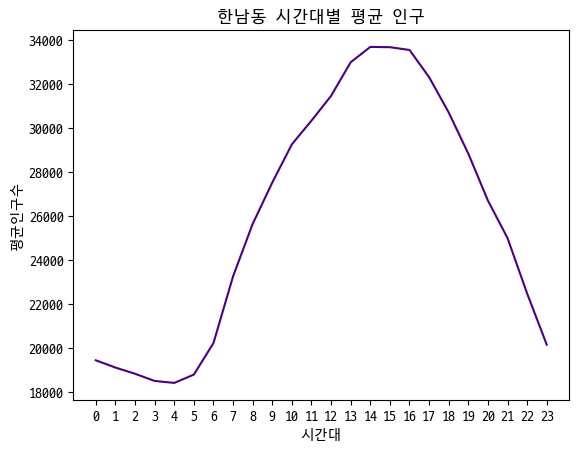

In [ ]:
plt.title(dong_name + ' 시간대별 평균 생활 인구')
plt.plot(range(24), s, color='indigo')
plt.xticks(range(24))
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()

In [14]:
dong_code1 = False
dong_code2 = False

dong_name1 = input("첫번째 행정동 입력 :")
dong_name2 = input("두번째 행정동 입력 :")

for r in code_data:
    if  r[-1] == dong_name1:
        dong_code1 = r[1]
    if  r[-1] == dong_name2:
        dong_code2 = r[1]     
        
if dong_code1:
    print(f"{dong_name1}의 행정동코드는 {dong_code1}입니다.")
else:
    print(f"{dong_name1}에 해당하는 코드를 찾을 수 없습니다.")
    
if dong_code2:
    print(f"{dong_name2}의 행정동코드는 {dong_code2}입니다.")
else:
    print(f"{dong_name2}에 해당하는 코드를 찾을 수 없습니다.")

한남동의 행정동코드는 11170685입니다.
역삼1동의 행정동코드는 11680640입니다.


In [15]:
s1 = [0 for i in range(24)]
s2 = [0 for i in range(24)]

for row in data: 
    # 첫 번째 행정동의 시간대별 인구수 총합 구하기
    if row[2] == dong_code1: 
        s1[row[1]] += row[3]

    # 두 번째 행정동의 시간대별 인구수 총합 구하기
    elif row[2] == dong_code2: 
        s2[row[1]] += row[3]

s1 = [p/31 for p in s1]
s2 = [p/31 for p in s2]

print(s1)
print(s2)

[19427.42521290322, 19097.272706451615, 18814.83197096774, 18489.857696774194, 18398.556374193548, 18777.03367741936, 20210.910564516125, 23244.50274838709, 25632.935470967743, 27513.400816129037, 29254.970551612903, 30331.721203225803, 31459.788661290317, 32988.10215483871, 33686.310122580646, 33674.307858064516, 33547.687300000005, 32310.953138709676, 30701.8342483871, 28830.053519354835, 26695.832483870974, 24988.792383870965, 22468.743264516128, 20139.4864]
[60048.20209032258, 58670.37148709679, 57982.623061290324, 57493.90192258064, 57242.20562580645, 58028.25505806453, 61723.99347741936, 72946.90893548387, 92959.4634387097, 112371.37807096772, 121579.63846451612, 129530.74792580646, 132074.6904806452, 132873.4882903226, 132686.71633225805, 130892.09649999999, 127381.83219677421, 121389.42822258065, 109903.09230322579, 98038.34736774194, 89422.25150645159, 80684.14352903224, 70466.37857096775, 62970.22338064515]


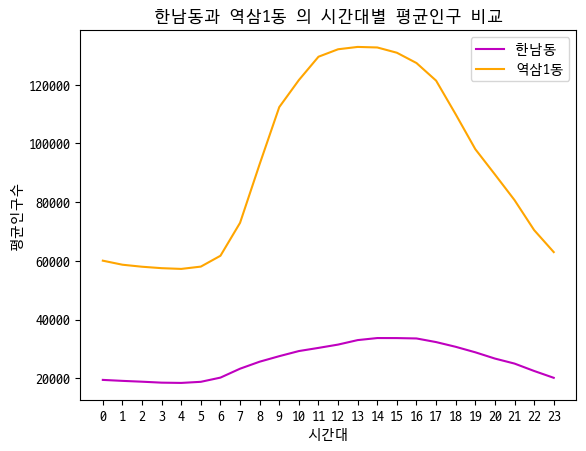

In [16]:
plt.title(dong_name1 + '과 '+dong_name2+' 의 시간대별 평균인구 비교')
plt.plot(range(24), s1, color = 'm', label=dong_name1)
plt.plot(range(24), s2, color = 'orange', label =dong_name2)
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24), range(24))
plt.grid(False)
plt.show()